## Categories

In [3]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
categories = pd.read_csv(r'df_categories_.csv', sep = '\t', encoding='utf-8',nrows=1000)

In [5]:
all_cats = []
for row in range(len(categories)):
    for item in str(categories.loc[row]['categories']).split(','):
        #print(item)
        if item not in all_cats:
            item = item.replace('[','').replace(']','')
            item = item.translate(str.maketrans({"'":None}))
            item = item.translate(str.maketrans({'"':None}))
            item = item.strip()
            all_cats.append(item)

In [6]:
all_cats = pd.Series(all_cats)

In [7]:
all_cats.drop_duplicates(keep='first', inplace=True)

In [8]:
val_list = ['No']*len(all_cats)

In [9]:
categories[all_cats.to_list()] = pd.DataFrame([val_list], index=categories.index)

In [10]:
categories.columns = categories.columns.str.strip()

In [11]:
for row in range(len(categories)):
    for col in categories.columns:
        #print(col)
        if col in str(categories.loc[row]['categories']):
            #print('Yes')
            categories.loc[row, col] = 'Yes'

In [12]:
categories.head(5)

,name,id,url,full_url,categories,Adventure,Exploration,Fantasy,Fighting,Miniatures,...,American Revolutionary War,Napoleonic,Childrens Game,Memory,American Civil War,Vietnam War,Math,Number,Trivia,nan
0,Gloomhaven,174430,/boardgame/174430/gloomhaven,https://boardgamegeek.com/boardgame/174430/glo...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...",Yes,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,No
1,Pandemic Legacy: Season 1,161936,/boardgame/161936/pandemic-legacy-season-1,https://boardgamegeek.com/boardgame/161936/pan...,"['Environmental', 'Medical']",No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Brass: Birmingham,224517,/boardgame/224517/brass-birmingham,https://boardgamegeek.com/boardgame/224517/bra...,"['Economic', 'Industry / Manufacturing', 'Trai...",No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Terraforming Mars,167791,/boardgame/167791/terraforming-mars,https://boardgamegeek.com/boardgame/167791/ter...,"['Economic', 'Environmental', 'Industry / Manu...",No,Yes,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Twilight Imperium: Fourth Edition,233078,/boardgame/233078/twilight-imperium-fourth-edi...,https://boardgamegeek.com/boardgame/233078/twi...,"['Civilization', 'Economic', 'Exploration', 'N...",No,Yes,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [13]:
categories.drop(['id', 'url', 'full_url'],axis=1)

,name,categories,Adventure,Exploration,Fantasy,Fighting,Miniatures,Environmental,Medical,Economic,...,American Revolutionary War,Napoleonic,Childrens Game,Memory,American Civil War,Vietnam War,Math,Number,Trivia,nan
0,Gloomhaven,"['Adventure', 'Exploration', 'Fantasy', 'Fight...",Yes,Yes,Yes,Yes,Yes,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Pandemic Legacy: Season 1,"['Environmental', 'Medical']",No,No,No,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
2,Brass: Birmingham,"['Economic', 'Industry / Manufacturing', 'Trai...",No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
3,Terraforming Mars,"['Economic', 'Environmental', 'Industry / Manu...",No,Yes,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,No,No,No,No
4,Twilight Imperium: Fourth Edition,"['Civilization', 'Economic', 'Exploration', 'N...",No,Yes,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Reavers of Midgard,NaN,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
996,GIPF,['Abstract Strategy'],No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
997,Agra,['Industry / Manufacturing'],No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
998,Mission: Red Planet,"['Science Fiction', 'Space Exploration']",No,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [14]:
cats_calc = categories.copy(deep=True)
cats_calc.drop(['name', 'id', 'url', 'full_url', 'categories'], inplace = True,axis=1)

In [15]:
#cats_calc = cats_calc[0:1000]

In [16]:
counts = cats_calc.apply(pd.value_counts).fillna(0)
# plot
#sns.heatmap(counts, cmap="GnBu")

In [17]:
display(counts.T.sort_values('Yes',ascending =False)['Yes'])

Card Game                     246.0
Fantasy                       209.0
Economic                      197.0
Fighting                      155.0
Science Fiction               119.0
                              ...  
Trivia                          2.0
American Revolutionary War      2.0
Expansion for Base-game         1.0
Vietnam War                     1.0
Childrens Game                  0.0
Name: Yes, Length: 80, dtype: float64

In [18]:
categories.to_csv('categories_transformed.csv', sep='\t', encoding='utf-8', header='true')

In [19]:
bar_data = counts.T.sort_values('Yes', ascending =False)

In [20]:
bar_data[['Yes']].head(20).sum()

Yes    2070.0
dtype: float64

In [21]:
bar_data[['Yes']].head(86).sum()

Yes    3112.0
dtype: float64

In [22]:
bar_data.tail(5)

,No,Yes
Trivia,998.0,2.0
American Revolutionary War,998.0,2.0
Expansion for Base-game,999.0,1.0
Vietnam War,999.0,1.0
Childrens Game,1000.0,0.0


In [1]:
2070/3112.0

0.6651670951156813

In [20]:
2070.0/3112.0

0.6651670951156813

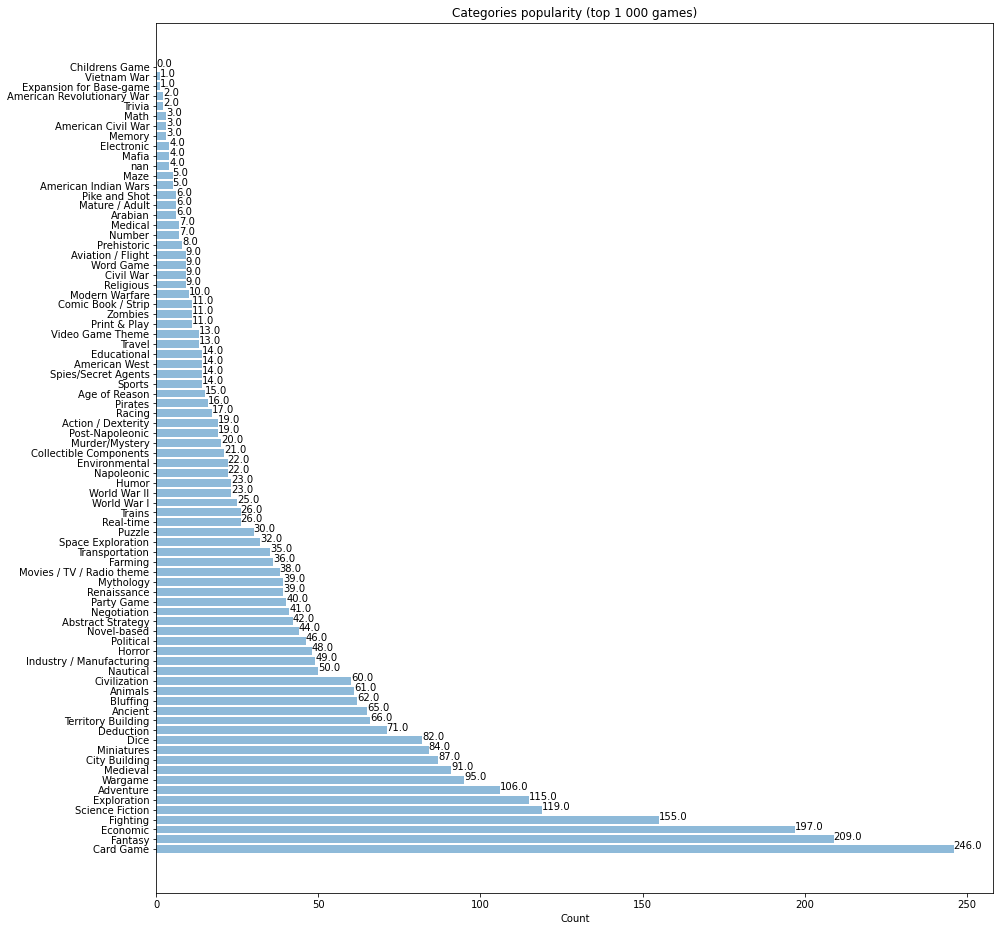

In [21]:
plt.figure(figsize=(15,16))
plt.barh(bar_data.index, bar_data['Yes'],  alpha=0.5)
plt.yticks(bar_data.index)
plt.xlabel('Count')
plt.title('Categories popularity (top 1 000 games)')
for index, value in enumerate(bar_data['Yes']):
    plt.text(value, index, str(value))
plt.show()

In [26]:
bar_data_20 = bar_data[bar_data['Yes'] >48]['Yes']

In [ ]:
bar_data_20

In [32]:
bar_data_20.index

Index(['Card Game', 'Fantasy', 'Economic', 'Fighting', 'Science Fiction',
       'Exploration', 'Adventure', 'Wargame', 'Medieval', 'City Building',
       'Miniatures', 'Dice', 'Deduction', 'Territory Building', 'Ancient',
       'Bluffing', 'Animals', 'Civilization', 'Nautical',
       'Industry / Manufacturing'],
      dtype='object')

In [42]:
bar_data['Yes']

Card Game                     246.0
Fantasy                       209.0
Economic                      197.0
Fighting                      155.0
Science Fiction               119.0
                              ...  
Trivia                          2.0
American Revolutionary War      2.0
Expansion for Base-game         1.0
Vietnam War                     1.0
Childrens Game                  0.0
Name: Yes, Length: 80, dtype: float64

In [43]:
bar_data_20

Card Game                   246.0
Fantasy                     209.0
Economic                    197.0
Fighting                    155.0
Science Fiction             119.0
Exploration                 115.0
Adventure                   106.0
Wargame                      95.0
Medieval                     91.0
City Building                87.0
Miniatures                   84.0
Dice                         82.0
Deduction                    71.0
Territory Building           66.0
Ancient                      65.0
Bluffing                     62.0
Animals                      61.0
Civilization                 60.0
Nautical                     50.0
Industry / Manufacturing     49.0
Name: Yes, dtype: float64

In [49]:
for index, value in enumerate(bar_data_20):
    print(index, value)

0 246.0
1 209.0
2 197.0
3 155.0
4 119.0
5 115.0
6 106.0
7 95.0
8 91.0
9 87.0
10 84.0
11 82.0
12 71.0
13 66.0
14 65.0
15 62.0
16 61.0
17 60.0
18 50.0
19 49.0


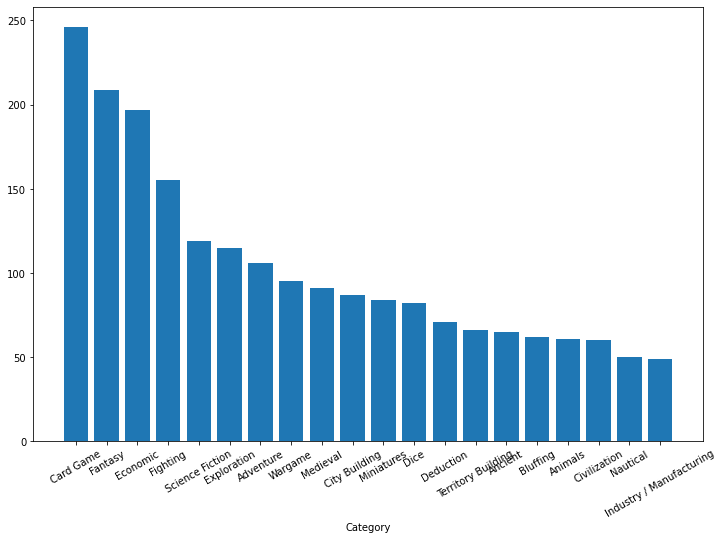

In [63]:
fig = plt.figure(figsize=(12,8))
plt.bar(bar_data_20.index, bar_data_20.values)
plt.xlabel('Category')
labels = bar_data_20.index
plt.xticks(labels, rotation=30)
plt.show()

In [45]:
for index, value in enumerate(bar_data_20):
    plt.text(value, index, str(value))

ValueError: Image size of 82426x4170 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [ ]:
plt.figure(figsize=(15,16))
plt.barh(bar_data.index, bar_data['Yes'],  alpha=0.5)
plt.yticks(bar_data.index)
plt.xlabel('Count')
plt.title('Categories popularity (top 1 000 games)')
for index, value in enumerate(bar_data['Yes']):
    plt.text(value, index, str(value))
plt.show()

In [22]:
bar_data[0:3,'Yes']

TypeError: '(slice(0, 3, None), 'Yes')' is an invalid key

In [ ]:
bar_data[0:20]['Yes'].index